In [1]:
%pylab inline
import pandas as pd
import scanpy as sc

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def postprocess(adata,view=True):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata)
    adata.raw = adata
    adata = adata[:, adata.var.highly_variable]
    print('after select HVG',adata.shape)
    sc.pp.scale(adata)
    sc.tl.pca(adata)
    sc.pp.neighbors(adata)
    if view:
        sc.tl.tsne(adata)
        sc.tl.umap(adata)
    return adata

In [3]:
def cluster_k_leiden(embadata,n_cluster):
    max_steps=120
    this_step = 0
    this_min = 0
    this_max = 2
    print('reference cluster number',n_cluster)
    while this_step < max_steps:
        this_resolution = this_min + ((this_max-this_min)/2)
        sc.tl.leiden(embadata,resolution=this_resolution,random_state=42)
        this_clusters = embadata.obs['leiden'].nunique()
        if this_clusters > n_cluster:
            this_max = this_resolution
        elif this_clusters < n_cluster:
            this_min = this_resolution
        else:break
        this_step+=1
    if this_step==max_steps:
        print('Cannot find the number of clusters')
        print('Use resolution',this_resolution)
    else:
        print('use resolution',this_resolution)
     # leiden
    sc.tl.leiden(embadata,resolution=this_resolution,random_state=42,key_added=f'cluster_{n_cluster}')

In [4]:
refdf = pd.read_csv('./baron/baron_human_ref_19264_fromsaver.csv',index_col=0)
sampledf = pd.read_csv('./baron/baron_human_samp_19264_fromsaver.csv',index_col=0)
magicdf = pd.read_csv('./baron/baron_human_magic.csv',index_col=0,sep='\t').T
saverdf = pd.read_csv('./baron/baron_human_saver.csv',index_col=0,sep='\t').T

In [5]:
scimputedf = pd.read_csv('./SAVER-data/baron_human_samp_scimpute.csv',index_col=0,sep='\t').T

/tmp/ipykernel_9585/649253412.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  tmp2adata = sc.AnnData(refdf)


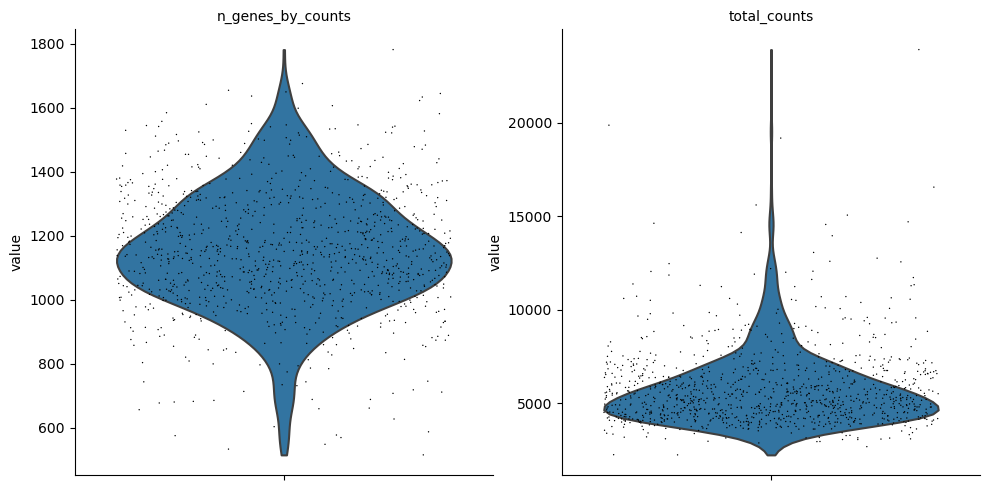

In [6]:
# ref
import scanpy as sc
tmp2adata = sc.AnnData(refdf)
sc.pp.calculate_qc_metrics(tmp2adata,percent_top=None, log1p=False, inplace=True)
figsize(4,3)
sc.pl.violin(tmp2adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

/tmp/ipykernel_9585/1871480823.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  tmp2adata = sc.AnnData(sampledf)


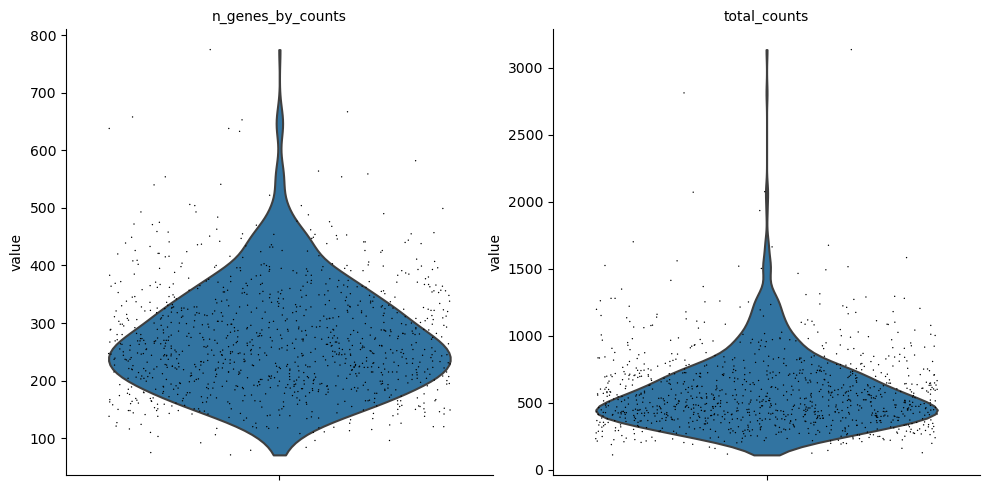

In [8]:
# ref
import scanpy as sc
tmp2adata = sc.AnnData(sampledf)
sc.pp.calculate_qc_metrics(tmp2adata,percent_top=None, log1p=False, inplace=True)
figsize(4,3)
sc.pl.violin(tmp2adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

In [9]:
refAdata = sc.AnnData(refdf)
refAdata = postprocess(refAdata,True)

sampleAdata = sc.AnnData(sampledf)
sampleAdata = postprocess(sampleAdata,True)

magicAdata = sc.AnnData(magicdf)
magicAdata = postprocess(magicAdata,True)

saverAdata = sc.AnnData(saverdf)
saverAdata = postprocess(saverAdata,True)

scimputeAdata = sc.AnnData(scimputedf)
scimputeAdata = postprocess(scimputeAdata,True)

/tmp/ipykernel_9585/147598611.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  refAdata = sc.AnnData(refdf)


after select HVG (1076, 432)


/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/tmp/ipykernel_9585/147598611.py:4: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sampleAdata = sc.AnnData(sampledf)


after select HVG (1076, 496)


/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/tmp/ipykernel_9585/147598611.py:7: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  magicAdata = sc.AnnData(magicdf)
/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/sklearn/manifold/_t_sn

after select HVG (1076, 527)


/tmp/ipykernel_9585/147598611.py:10: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  saverAdata = sc.AnnData(saverdf)
/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


after select HVG (1076, 658)


/tmp/ipykernel_9585/147598611.py:13: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  scimputeAdata = sc.AnnData(scimputedf)
/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


after select HVG (1076, 548)


/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [10]:
sc.tl.leiden(refAdata,resolution=0.6)

In [11]:
numcls = refAdata.obs.leiden.unique().shape[0]
numcls

7

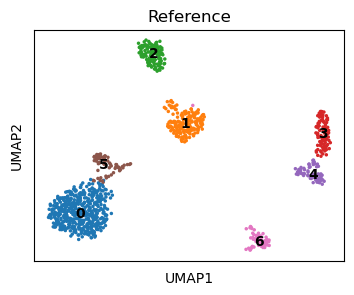

In [12]:
sc.pl.umap(refAdata,color=[f'leiden'],size=25,title='Reference',legend_loc='on data')

In [13]:
sampledf = pd.read_csv('./baron/baron_human_samp_19264_fromsaver.csv',index_col=0)
scviAdata = sc.AnnData(sampledf)

sc.pp.highly_variable_genes(
    scviAdata,
    flavor="seurat_v3",
    n_top_genes=2000,
    subset=True,
)

import scvi
scvi.model.SCVI.setup_anndata(scviAdata)

vae = scvi.model.SCVI(scviAdata)

vae.train()

scviemb = vae.get_latent_representation()

scviAdata = sc.AnnData(pd.DataFrame(scviemb,index=refdf.index))
sc.pp.scale(scviAdata)
sc.tl.pca(scviAdata)
sc.pp.neighbors(scviAdata)

sc.tl.umap(scviAdata)
sc.tl.tsne(scviAdata)

/tmp/ipykernel_9585/735314590.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  scviAdata = sc.AnnData(sampledf)
Global seed set to 0
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py:1933: PossibleUserWarning: The number of training batches (8) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 400/400: 100%|████████████████████████████████████████████████████████████████████████| 400/400 [00:27<00:00, 14.34it/s, loss=599, v_num=1]


/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [14]:
cluster_k_leiden(sampleAdata,numcls)
cluster_k_leiden(magicAdata,numcls)
cluster_k_leiden(saverAdata,numcls)
cluster_k_leiden(scimputeAdata,numcls)
cluster_k_leiden(scviAdata,numcls)

reference cluster number 7
use resolution 0.9375
reference cluster number 7
use resolution 0.046875
reference cluster number 7
use resolution 0.75
reference cluster number 7
use resolution 1.0
reference cluster number 7
use resolution 0.875


In [15]:
adatalist = [sampleAdata,magicAdata,saverAdata,scimputeAdata,scviAdata]
for tmpadata in adatalist:
    tmpadata.obs['refleiden']=refAdata.obs['leiden']

## continous

In [16]:
from sklearn.metrics.cluster import adjusted_rand_score,normalized_mutual_info_score,davies_bouldin_score,calinski_harabasz_score,silhouette_score

scnmi=[]
scari=[]
scch = []
scdb=[]
scsil=[]
for i in np.arange(1,5.5,0.5):
    if i==0:
        # imputeemb = np.load('baron/baron_human_samp_19264_fromsaver_50M-0.1B-res_embedding_768.npy')
        imputeemb = np.load('baron/baron_human_samp_19264_fromsaver_50M-0.1B-res_embedding.npy')
        
    else:
        # imputeemb = np.load(f'baron/baron_human_samp_19264_fromsaver_50M-0.1B-res_tgthighres{i:.1f}_embedding_768.npy')
        imputeemb = np.load(f'baron/baron_human_samp_19264_fromsaver_50M-0.1B-res_fold{i:.1f}_embedding.npy')
        
    imputeAdata = sc.AnnData(pd.DataFrame(imputeemb,index=refdf.index))
    sc.pp.scale(imputeAdata)
    sc.tl.pca(imputeAdata)
    sc.pp.neighbors(imputeAdata)
    # sc.tl.tsne(imputeAdata)
    # sc.tl.umap(imputeAdata)
    cluster_k_leiden(imputeAdata,numcls)    
    imputenmi = normalized_mutual_info_score(refAdata.obs[f'leiden'], imputeAdata.obs[f'cluster_{numcls}']) 
    imputeari = adjusted_rand_score(refAdata.obs[f'leiden'], imputeAdata.obs[f'cluster_{numcls}']) 
    scnmi.append(imputenmi)
    scari.append(imputeari)
    scch.append(calinski_harabasz_score(refAdata.obsm['X_pca'],imputeAdata.obs[f'cluster_{numcls}']))
    scdb.append(davies_bouldin_score(refAdata.obsm['X_pca'],imputeAdata.obs[f'cluster_{numcls}']))
    scsil.append(silhouette_score(refAdata.obsm['X_pca'],imputeAdata.obs[f'cluster_{numcls}']))

/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


reference cluster number 7
use resolution 0.474609375


/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


reference cluster number 7
use resolution 0.46875


/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


reference cluster number 7
use resolution 0.46875
reference cluster number 7


/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


use resolution 0.5


/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


reference cluster number 7
use resolution 0.5


/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


reference cluster number 7
use resolution 0.5


/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


reference cluster number 7
use resolution 0.5


/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


reference cluster number 7
use resolution 0.5


/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


reference cluster number 7
use resolution 0.5


### NMI

In [17]:
import seaborn as sns
import colorbm as cbm
sns.set_palette(sns.color_palette(cbm.pal('npg').as_hex))
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['axes.spines.left'] = True
rcParams['axes.spines.bottom'] = True
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

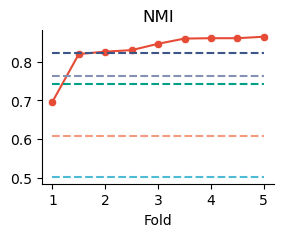

In [18]:
figsize(3,2)
import seaborn as sns
scorelist=[]
for tmpadata in adatalist:
    scorelist.append(normalized_mutual_info_score(tmpadata.obs[f'refleiden'], tmpadata.obs[f'cluster_{numcls}']))

axisx = np.arange(1,5.5,0.5)
    
sns.scatterplot(x=axisx,y=scnmi)
sns.lineplot(x=axisx,y=scnmi,label=f'scEPT')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[0]]*2,label=f'Sample',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[1]]*2,label=f'MAGIC',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[2]]*2,label=f'SAVER',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[3]]*2,label=f'scImpute',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[4]]*2,label=f'scVI',linestyle='dashed')
plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))
plt.legend([],[], frameon=False)
plt.title(f"NMI")
plt.xlabel(f"Fold");
# plt.savefig('Baron_NMI_fold.pdf',bbox_inches='tight')

### ARI

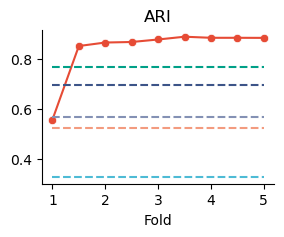

In [19]:
figsize(3,2)
scorelist=[]
for tmpadata in adatalist:
    scorelist.append(adjusted_rand_score(tmpadata.obs[f'refleiden'], tmpadata.obs[f'cluster_{numcls}']))

sns.scatterplot(x=axisx,y=scari)
sns.lineplot(x=axisx,y=scari,label=f'scEPT Highres')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[0]]*2,label=f'Sample',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[1]]*2,label=f'MAGIC',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[2]]*2,label=f'SAVER',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[3]]*2,label=f'scImpute',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[4]]*2,label=f'scVI',linestyle='dashed')

plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))
plt.legend([],[], frameon=False)
plt.title(f"ARI")
# plt.xlabel(f"Added Resolution (Log)");
plt.xlabel(f"Fold");
# plt.savefig('Baron_ARI_fold.pdf',bbox_inches='tight')

### silhouette_score

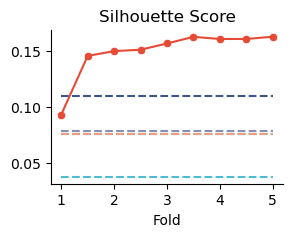

In [20]:
figsize(3,2)
scorelist=[]
for tmpadata in adatalist:
    scorelist.append(silhouette_score(refAdata.obsm[f'X_pca'], tmpadata.obs[f'cluster_{numcls}']))
# scorelist.append(silhouette_score(adatalist[-1].X, adatalist[-1].obs[f'cluster_{numcls}']))

sns.scatterplot(x=axisx,y=scsil)
sns.lineplot(x=axisx,y=scsil,label=f'scEPT Highres')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[0]]*2,label=f'Sample',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[1]]*2,label=f'MAGIC',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[2]]*2,label=f'SAVER',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[3]]*2,label=f'scImpute',linestyle='dashed')
sns.lineplot(x=[axisx[0],axisx[-1]],y=[scorelist[4]]*2,label=f'scVI',linestyle='dashed')

plt.legend(loc='center right',bbox_to_anchor=(1.4, 0.5))
plt.legend([],[], frameon=False)
plt.title(f"Silhouette Score")
# plt.xlabel(f"Added Resolution (Log)");
plt.xlabel(f"Fold");
# plt.savefig('Baron_sil_fold.pdf',bbox_inches='tight')

In [21]:
imputeemb = np.load(f'baron/baron_human_samp_19264_fromsaver_50M-0.1B-res_tgthighres5_embedding.npy')
imputeAdata = sc.AnnData(pd.DataFrame(imputeemb,index=refdf.index))
sc.pp.scale(imputeAdata)
sc.tl.pca(imputeAdata)
sc.pp.neighbors(imputeAdata)

sc.tl.tsne(imputeAdata)
sc.tl.umap(imputeAdata)

cluster_k_leiden(imputeAdata,numcls)
imputeAdata.obs['refleiden']=refAdata.obs['leiden']

/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/minsheng_2022/anaconda3/envs/scvi/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


reference cluster number 7
use resolution 0.5


In [23]:
namelist = ['Sample','MAGIC','SAVER','scImpute','scVI','scFoundation']

<AxesSubplot:title={'center':'Reference'}, xlabel='UMAP1', ylabel='UMAP2'>

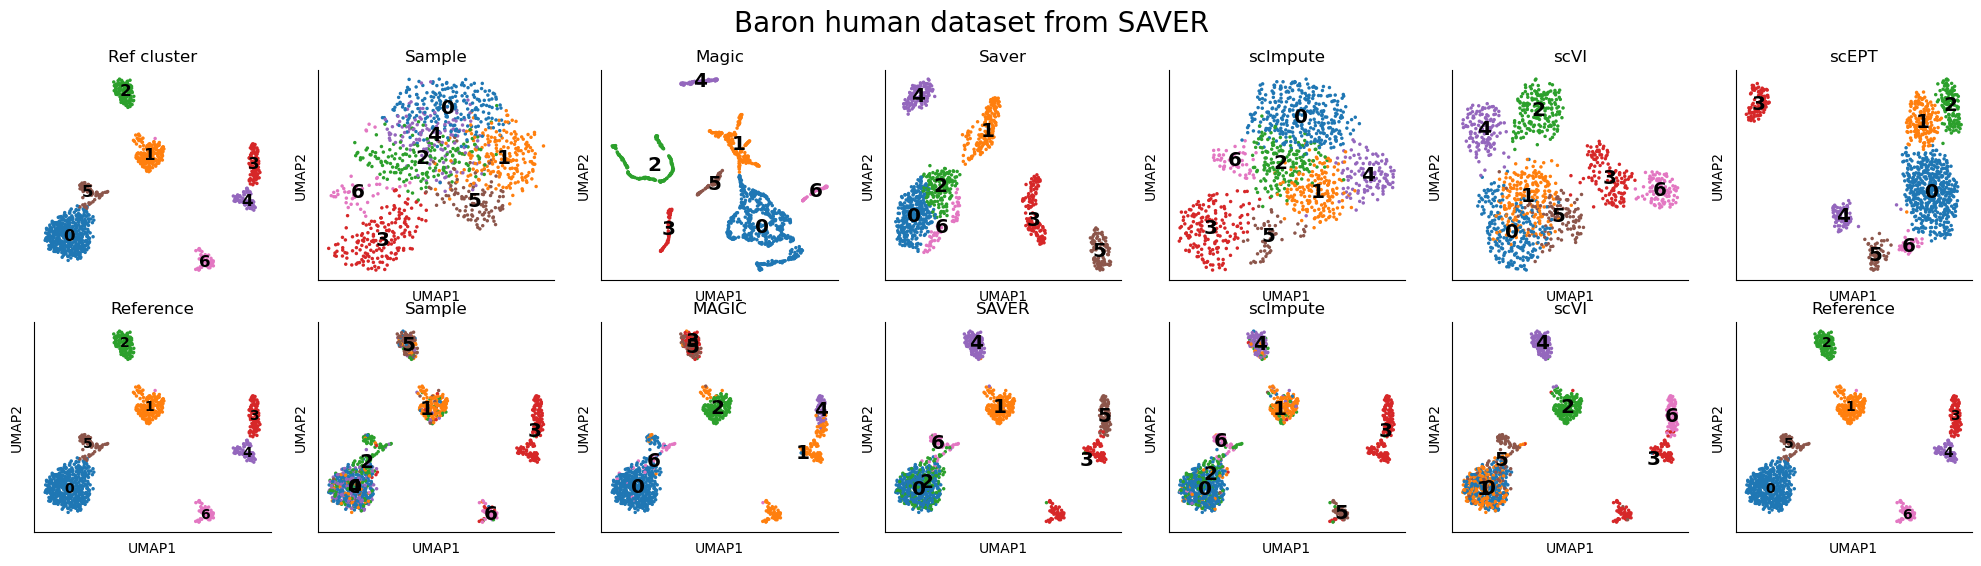

In [28]:
sns.set_palette(sns.color_palette(cbm.pal('npg').as_hex))
fig, axes = plt.subplots(2,7,figsize=(25,6))
fig.suptitle(f'Baron human dataset from SAVER',fontsize=20)

sc.pl.umap(refAdata,color=[f'leiden'],size=25,ax=axes[0][0],show=False,title='Ref cluster',legend_loc='on data',legend_fontweight='black',legend_fontsize='large',frameon=False)
sc.pl.umap(sampleAdata,color=[f'leiden'],size=25,ax=axes[0][1],show=False,title='Sample',legend_loc='on data',palette=refAdata.uns['leiden_colors'],legend_fontweight='black',legend_fontsize='x-large',frameon=True)
sc.pl.umap(magicAdata,color=[f'leiden'],size=25,ax=axes[0][2],show=False,title='Magic',legend_loc='on data',palette=refAdata.uns['leiden_colors'],legend_fontweight='black',legend_fontsize='x-large',frameon=True)
sc.pl.umap(saverAdata,color=[f'leiden'],size=25,ax=axes[0][3],show=False,title='Saver',legend_loc='on data',palette=refAdata.uns['leiden_colors'],legend_fontweight='black',legend_fontsize='x-large',frameon=True)
sc.pl.umap(scimputeAdata,color=[f'leiden'],size=25,ax=axes[0][4],show=False,title='scImpute',legend_loc='on data',palette=refAdata.uns['leiden_colors'],legend_fontweight='black',legend_fontsize='x-large',frameon=True)
sc.pl.umap(scviAdata,color=[f'leiden'],size=25,ax=axes[0][5],show=False,title='scVI',legend_loc='on data',palette=refAdata.uns['leiden_colors'],legend_fontweight='black',legend_fontsize='x-large',frameon=True)
sc.pl.umap(imputeAdata,color=[f'leiden'],size=25,ax=axes[0][6],show=False,title='scEPT',legend_loc='on data',palette=refAdata.uns['leiden_colors'],legend_fontweight='black',legend_fontsize='x-large',frameon=True)


sc.pl.umap(refAdata,color=[f'leiden'],size=25,ax=axes[1][0],show=False,title='Reference',legend_loc='on data')
for name,tmpadata in zip(namelist,adatalist):
    refAdata.obs['tmpcls']=tmpadata.obs[f'cluster_{numcls}']
    sc.pl.umap(refAdata,color=[f'tmpcls'],size=25,ax=axes[1][namelist.index(name)+1],show=False,title=name,legend_loc='on data',legend_fontweight='black',legend_fontsize='x-large',frameon=True,palette=refAdata.uns['leiden_colors'])
sc.pl.umap(refAdata,color=[f'leiden'],size=25,ax=axes[1][6],show=False,title='Reference',legend_loc='on data',frameon=True,palette=refAdata.uns['leiden_colors'])